In [5]:
import yasa
import numpy as np
import pandas as pd
import seaborn as sns

# Load data
f = np.load('data_full_6hrs_100Hz_Cz+Fz+Pz.npz')
data, ch_names = f['data'], f['chan']
sf = 100.
times = np.arange(data.size) / sf

print(data.shape, ch_names)
print(np.round(data[:, 0:5], 3))

(3, 2161058) ['Cz' 'Fz' 'Pz']
[[15.797 22.307 39.922 25.657 27.094]
 [16.896 26.385 40.966 21.833 24.456]
 [ 5.899 14.297 36.592 26.094 23.395]]


In [7]:
hypno_30s = np.loadtxt('data_full_6hrs_100Hz_hypno_30s.txt')
hypno = yasa.hypno_upsample_to_data(hypno=hypno_30s, sf_hypno=(1/30), data=data, sf_data=sf)
print(hypno.shape, 'Unique values =', np.unique(hypno))

12-Aug-22 07:37:20 | WARNING | Hypnogram is SHORTER than data by 10.58 seconds. Padding hypnogram with last value to match data.size.


(2161058,) Unique values = [0. 1. 2. 3. 4.]


<class 'numpy.ndarray'>


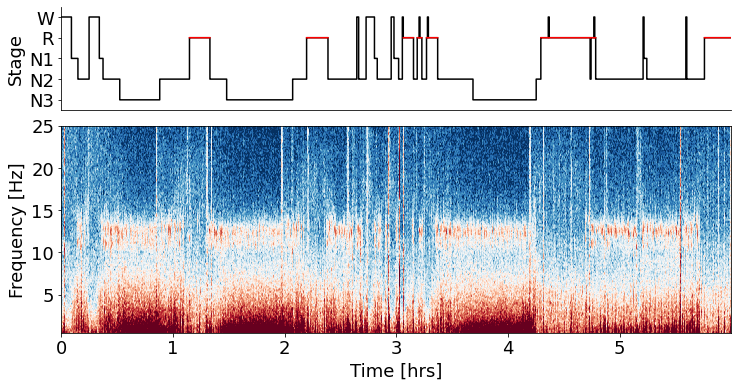

In [14]:
# We use data[0, :] to select only the first channel, which in this case is Cz
fig = yasa.plot_spectrogram(data[0, :], sf, hypno)